# Consultant of Network Attack Detection


deskripsi (ada di pdf).

Network Intrusion Detection  System (NIDS)

## Goal

Untuk menganalisis klasifikasi type of attack berdasarkan variabel kunci.

Untuk menemukan model klasifikasi terbaik (objectives) Network Intrusion Detection  System (NIDS).

## Source of the dataset

GDrive: [click here](https://drive.google.com/drive/folders/1lOz8fx9AI7lWSEN9myIn18RmMrPErq8D?usp=drive_link)

## Atribute Information

The inputs (Var X/independent var) are as follows

- duration
- protocol_type
- service
- flag
- src_bytes
- dst_bytes
- land
- wrong_fragment
- urgent
- hot
- num_failed_logins
- logged_in
- num_compromised
- root_shell
- su_attempted
- num_root
- num_file_creations
- num_shells
- num_access_files
- num_outbound_cmds
- is_host_login
- is_guest_login
- count
- srv_count
- serror_rate
- srv_serror_rate
- rerror_rate
- srv_rerror_rate
- same_srv_rate
- diff_srv_rate
- srv_diff_host_rate
- dst_host_count
- dst_host_srv_count
- dst_host_same_srv_rate
- dst_host_diff_srv_rate
- dst_host_same_src_port_rate
- dst_host_srv_diff_host_rate
- dst_host_serror_rate
- dst_host_srv_serror_rate
- dst_host_rerror_rate
- dst_host_srv_rerror_rate
- type_of_attack

The output (target/Y/dependent var) is as follow:

- detect attack

# Import Library


In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from ydata_profiling import ProfileReport
from scipy.interpolate import PchipInterpolator
from imblearn.combine import SMOTEENN

install

pip install plotly

pip install imbalanced-learn


# 0. Import Dataset

In [201]:
# Path to training and validation dataset
train_PATH = 'D:\DAC-2023\Dataset\DataTrain_Preliminary.csv'

As a network attack detection consultant, we have been provided with two datasets: one for training and one for prediction. With these datasets, we can already narrow down the scope of our analysis, which in this case is creating a predictive model. Predictive model will naturally involve machine learning techniques. However, the field of machine learning itself is quite broad.

Therefore, we will begin by closely examining the data to refine our analysis to choose the best algorithm to discover the predictive model for effective network attack detection. This process involves exploring the data, identifying relevant features, and iteratively refining our approach until we find the most suitable predictive model.

In [202]:
df = pd.read_csv(train_PATH, delimiter=';')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,type_of_attack
0,0,tcp,private,SH,0,0,0,0,0,0,...,1,0.01,0.94,0.95,0,0.95,1,0,0,nmap
1,0,tcp,private,S0,0,0,0,0,0,0,...,5,0.02,0.08,0.00,0,1.00,1,0,0,neptune
2,0,tcp,http,SF,285,3623,0,0,0,0,...,228,1.00,0.00,0.01,*,0.00,0,0,0,normal
3,0,tcp,http,SF,232,584,0,0,0,0,...,255,1.00,0.00,0.17,*,0.00,0,0,0,normal
4,1,tcp,smtp,SF,1080,327,0,0,0,0,...,154,0.58,0.02,0.00,*,0.00,0,0,0,normal


In [ ]:
df.shape

## Feature Description

- duration : the length of time connection in seconds
- protocol_type : the protocol used fot the connection
- service : the name of the network service on the target host
- flag : the status or state of the connection
- src_bytes : the number of bytes transferred from the source to destination
- dst_bytes : the number of bytes transferred from the destination to source
- land : indicates whether the connection is from/to the same host/port (1 if yes, 0 if no)
- wrong_fragment : the number of "wrong" fragments in a connection
- urgent : the number of urgent packets in a connection
- hot : the number of "hot" indicators in a connection
- num_failed_logins : the number of failed login attempts
- logged_in : indicates whether a login was successfully performed (1 if yes, 0 if no)
- num_compromised : the number of hosts compromised through the connection
- root_shell : indicates whether a root shell was obtained (1 if yes, 0 if no)
- su_attempted : indicates whether a "su root" command was attempted (1 if yes, 0 if no)
- num_root : the number of root access obtained
- num_file_creations : the number of file creation operations
- num_shells : te number of shell prompts
- num_access_files : the number of operations on access control files
- num_outbound_cmds : the number of outbound commands in an FTP session
- is_host_login : indicates whether the login belongs to the "hot" list (1 if yes, 0 if no)
- is_guest_login : indicates whether the login is a guest login (1 if yes, 0 if no)
- count : the number of connections to the same host as the current connection in the past two seconds
- srv_count : the number of connections to the same service as the current connection in the past two seconds
- serror_rate : the percentage of connections that had "SYN" errors (SYN : SYNCHRONIZE)
- srv_serror_rate : the percentage of connections to the same service that had "SYN" errors
- rerror_rate : the percentage of connections to the same service that had "REJ" errors (REJ : REJECTION) 
- srv_rerror_rate : the percentage of connections to the same 
service that had "REJ" errors
- same_srv_rate : the percentage of connections to the same service
- diff_srv_rate : the percentage of connections to different services
- srv_diff_host_rate : the percentage of connections to different hosts
- dst_host_count : the number of connections to the same destination host in the past two seconds
- dst_host_srv_count : the number of connections to the same destination service in the past two seconds
- dst_host_same_srv_rate : the percentage of connections to the same destination service
- dst_host_diff_srv_rate : the percentage of connections to different destination services
- dst_host_same_src_port_rate : he percentage of connections to the same destination host that originate from the same source port
- dst_host_srv_diff_host_rate : the percentage of connections to the same destination service but originating from different host
- dst_host_serror_rate : the percentage of connections to a specific destination host that have a “SYN” error
- dst_host_srv_serror_rate : the percentage of connections to a specific destination service that have a “SYN” error
- dst_host_rerror_rate : the percentage of connections to a specific destination host that have a “REJ” error
- dst_host_srv_rerror_rate : the percentage of connections to a specific destination service that have a “REJ” error
- type_of_attack : type of attack

# 1 Data Cleaning

## 1.1 removing nan values

In [203]:
nan_sum = df.isnull().sum()
nan_sum = nan_sum[nan_sum > 0]
nan_sum

protocol_type                   668
service                        1020
flag                            853
dst_host_same_srv_rate          328
dst_host_diff_srv_rate          243
dst_host_same_src_port_rate     438
dst_host_serror_rate            428
dtype: int64

In [204]:
# Count the number of rows with at least one missing value (NaN) or "*" values
rows_with_missing_values = df[df.isnull().any(axis=1)]

# Calculate the percentage of rows with missing values
percentage_rows_with_missing = (len(rows_with_missing_values) / len(df)) * 100

# Display the result
print(f"Persentage of rows with NaN value/s: {percentage_rows_with_missing:.2f}%")

Persentage of rows with NaN value/s: 3.36%


Presentase row yang memiliki nan value = 3.36%. karena 3.36% < 25% maka row dengan nan value bisa dihapus. adapun caranya adalah sebagai berikut:

In [205]:
df.dropna(inplace=True)
df.shape

(108666, 42)

## 1.2 Change Type of the Data and Fill Missing Value

### bool data type

In [206]:
# pick colom that should bool data type
bool_df = df.copy()
bool_df = bool_df[['land', 'logged_in', 'root_shell', 'su_attempted',
                   'is_host_login', 'is_guest_login', 'serror_rate', 
                   'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
                   'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
                   'type_of_attack']]

In [207]:
# Function to filter df based on type of attack
def filtered_by_type_of_attack(df, values):
    filtered = df[df['type_of_attack'] == values]
    return filtered

# List of unique attack types
attack_types = bool_df['type_of_attack'].unique()

# Initialize a dictionary to store probabilities for each attack type
probability_dict = {}

# Iterate through each attack type and store probabilities
for attack_type in attack_types:
    filtered_data = filtered_by_type_of_attack(bool_df, attack_type)

    probability_land = filtered_data['land'].value_counts(normalize=True).get('0', 0)
    probability_logged_in = filtered_data['logged_in'].value_counts(normalize=True).get('0', 0)
    probability_root_shell = filtered_data['root_shell'].value_counts(normalize=True).get('0', 0)
    probability_su_attempted = filtered_data['su_attempted'].value_counts(normalize=True).get('0', 0)
    probability_is_host_login = filtered_data['is_host_login'].value_counts(normalize=True).get('0', 0)
    probability_is_guest_login = filtered_data['is_guest_login'].value_counts(normalize=True).get('0', 0)
    probability_serror_rate = filtered_data['serror_rate'].value_counts(normalize=True).get('0', 0)
    probability_srv_serror_rate = filtered_data['srv_serror_rate'].value_counts(normalize=True).get('0', 0)
    probability_rerror_rate = filtered_data['rerror_rate'].value_counts(normalize=True).get('0', 0)
    probability_srv_rerror_rate = filtered_data['srv_rerror_rate'].value_counts(normalize=True).get('0', 0)
    probability_same_srv_rate = filtered_data['same_srv_rate'].value_counts(normalize=True).get('0', 0)
    probability_diff_srv_rate = filtered_data['diff_srv_rate'].value_counts(normalize=True).get('0', 0)
    probability_srv_diff_host_rate = filtered_data['srv_diff_host_rate'].value_counts(normalize=True).get('0', 0)

    # Store probabilities in the dictionary
    probability_dict[attack_type] = {
        'land': probability_land,
        'logged_in': probability_logged_in,
        'root_shell': probability_root_shell,
        'su_attempted': probability_su_attempted,
        'is_host_login': probability_is_host_login,
        'is_guest_login': probability_is_guest_login,
        'serror_rate': probability_serror_rate,
        'srv_serror_rate': probability_srv_serror_rate,
        'rerror_rate': probability_rerror_rate,
        'srv_rerror_rate': probability_srv_rerror_rate,
        'same_srv_rate': probability_same_srv_rate,
        'diff_srv_rate': probability_diff_srv_rate,
        'srv_diff_host_rate': probability_srv_diff_host_rate
    }

    # Function to convert '*' and '99999' based on probability
    def convert_value(value, probability):
      if value == '*' or value == '99999':
        random_number = np.random.rand()
        if random_number <= probability:
          return '0'
        else:
          return '1'
      else:
        return value

    for column in ['land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login', 
                   'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 
                   'diff_srv_rate', 'srv_diff_host_rate']:
      # Ambil probabilitas yang sesuai dari dictionary
      probability = probability_dict[attack_type][column]

      # Terapkan konversi ke seluruh kolom dalam DataFrame yang sesuai dengan jenis serangan saat ini
      bool_df.loc[bool_df['type_of_attack'] == attack_type, column] = bool_df.loc[bool_df['type_of_attack'] == attack_type, column].apply(lambda x: convert_value(x, probability))

In [208]:
# Mengubah tipe data menjadi numerik
columns_to_convert = [col for col in bool_df.columns if col != 'type_of_attack']
bool_df[columns_to_convert] = bool_df[columns_to_convert].astype(int)

In [209]:
bool_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108666 entries, 0 to 112445
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   land                108666 non-null  int32 
 1   logged_in           108666 non-null  int32 
 2   root_shell          108666 non-null  int32 
 3   su_attempted        108666 non-null  int32 
 4   is_host_login       108666 non-null  int32 
 5   is_guest_login      108666 non-null  int32 
 6   serror_rate         108666 non-null  int32 
 7   srv_serror_rate     108666 non-null  int32 
 8   rerror_rate         108666 non-null  int32 
 9   srv_rerror_rate     108666 non-null  int32 
 10  same_srv_rate       108666 non-null  int32 
 11  diff_srv_rate       108666 non-null  int32 
 12  srv_diff_host_rate  108666 non-null  int32 
 13  type_of_attack      108666 non-null  object
dtypes: int32(13), object(1)
memory usage: 7.0+ MB


### int data type

In [210]:
# pick colom that should int data type
int_df = df.copy()
int_df = int_df[['duration','src_bytes','dst_bytes','wrong_fragment',
                 'urgent','hot','num_failed_logins','num_compromised',
                 'num_root','num_file_creations','num_shells','num_access_files',
                 'num_outbound_cmds', 'count','srv_count','dst_host_count',
                 'dst_host_srv_count','type_of_attack']]

In [211]:
# 1. konversi * dan 99999 jadi nan value
int_df.replace(['*'], '99999', inplace=True)

# 2. ubah tipe data
# Mengubah tipe data menjadi numerik
columns_to_convert = [col for col in int_df.columns if col != 'type_of_attack']
int_df[columns_to_convert] = int_df[columns_to_convert].astype(int)

# 3. parting based on type of attack
# Function to filter df based on type of attack
def filtered_by_type_of_attack(df, values):
    filtered = df[df['type_of_attack'] == values]
    return filtered

nmap = filtered_by_type_of_attack(int_df, 'nmap')
neptune = filtered_by_type_of_attack(int_df, 'neptune')
normal = filtered_by_type_of_attack(int_df, 'normal')
dos = filtered_by_type_of_attack(int_df, 'Denial of Service Attack')
portsweep = filtered_by_type_of_attack(int_df, 'portsweep')
satan = filtered_by_type_of_attack(int_df, 'satan')
ipsweep = filtered_by_type_of_attack(int_df, 'ipsweep')
smurf = filtered_by_type_of_attack(int_df, 'smurf')

# stored df in list
filtered_dfs = [nmap, neptune, normal, dos, portsweep, satan, ipsweep, smurf]

# Loop through each filtered DataFrame and its corresponding index in the list
for filtered_df, attack_type in zip(filtered_dfs, ['nmap', 'neptune', 'normal', 'Denial of Service Attack', 'portsweep', 'satan', 'ipsweep', 'smurf']):
    for column in filtered_df.columns:
        if pd.api.types.is_numeric_dtype(filtered_df[column]):
            # Check if the column contains numeric data
            missing_mask = filtered_df[column] == 99999
            if missing_mask.any():
                # If there are missing values, interpolate
                x = filtered_df.index[~missing_mask]
                y = filtered_df[column][~missing_mask]
                pchip = PchipInterpolator(x, y, extrapolate='periodic')
                # Replace NaN values with interpolated values in the same DataFrame (filtered_df)
                interpolated_values = pchip(filtered_df.index)
                # Ensure the interpolated values are non-negative
                filtered_df[column].loc[missing_mask] = np.maximum(0, interpolated_values[missing_mask])

    # Copy the interpolated values back to the corresponding rows in the original int_df
    int_df.loc[int_df['type_of_attack'] == attack_type, filtered_df.columns] = filtered_df

# Mengubah tipe data menjadi numerik
columns_to_convert = [col for col in int_df.columns if col != 'type_of_attack']
int_df[columns_to_convert] = int_df[columns_to_convert].astype(int)

C:\Users\gusti\AppData\Local\Temp\ipykernel_31376\2018956271.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\gusti\AppData\Local\Temp\ipykernel_31376\2018956271.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\gusti\AppData\Local\Temp\ipykernel_31376\2018956271.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\gusti\AppData\Local\Temp\ipykernel_31376\2018956271.py:41: SettingWithCopyWarning:


A v

In [212]:
int_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108666 entries, 0 to 112445
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   duration            108666 non-null  int32 
 1   src_bytes           108666 non-null  int32 
 2   dst_bytes           108666 non-null  int32 
 3   wrong_fragment      108666 non-null  int32 
 4   urgent              108666 non-null  int32 
 5   hot                 108666 non-null  int32 
 6   num_failed_logins   108666 non-null  int32 
 7   num_compromised     108666 non-null  int32 
 8   num_root            108666 non-null  int32 
 9   num_file_creations  108666 non-null  int32 
 10  num_shells          108666 non-null  int32 
 11  num_access_files    108666 non-null  int32 
 12  num_outbound_cmds   108666 non-null  int32 
 13  count               108666 non-null  int32 
 14  srv_count           108666 non-null  int32 
 15  dst_host_count      108666 non-null  int32 
 16  dst_hos

### float data type

In [213]:
# pick colom that should float data type
float_df = df.copy()
float_df = df[['dst_host_same_srv_rate','dst_host_diff_srv_rate',
                 'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
                 'dst_host_serror_rate','dst_host_srv_serror_rate',
                 'dst_host_rerror_rate','dst_host_srv_rerror_rate',
                 'type_of_attack']]

In [214]:
# 1. konversi * dan 99999 jadi nan value
float_df.replace(['*','99999',99999], np.nan, inplace=True)

# 2. ubah tipe data
# Mengubah tipe data menjadi numerik
columns_to_convert = [col for col in float_df.columns if col != 'type_of_attack']
float_df[columns_to_convert] = float_df[columns_to_convert].astype(float)

# 3. parting based on type of attack
# Function to filter df based on type of attack
def filtered_by_type_of_attack(df, values):
    filtered = df[df['type_of_attack'] == values]
    return filtered

nmap = filtered_by_type_of_attack(float_df, 'nmap')
neptune = filtered_by_type_of_attack(float_df, 'neptune')
normal = filtered_by_type_of_attack(float_df, 'normal')
dos = filtered_by_type_of_attack(float_df, 'Denial of Service Attack')
portsweep = filtered_by_type_of_attack(float_df, 'portsweep')
satan = filtered_by_type_of_attack(float_df, 'satan')
ipsweep = filtered_by_type_of_attack(float_df, 'ipsweep')
smurf = filtered_by_type_of_attack(float_df, 'smurf')

# stored df in list
filtered_dfs = [nmap, neptune, normal, dos, portsweep, satan, ipsweep, smurf]

# Loop through each filtered DataFrame and its corresponding index in the list
for filtered_df, attack_type in zip(filtered_dfs, ['nmap', 'neptune', 'normal', 'Denial of Service Attack', 'portsweep', 'satan', 'ipsweep', 'smurf']):
    for column in filtered_df.columns:
        if pd.api.types.is_numeric_dtype(filtered_df[column]):
            # Check if the column contains numeric data
            missing_mask = filtered_df[column].isnull()
            if missing_mask.any():
                # If there are missing values, interpolate
                x = filtered_df.index[~missing_mask]
                y = filtered_df[column][~missing_mask]
                pchip = PchipInterpolator(x, y, extrapolate='periodic')
                # Replace NaN values with interpolated values in the same DataFrame (filtered_df)
                interpolated_values = pchip(filtered_df.index)
                # Ensure the interpolated values are non-negative
                filtered_df[column].loc[missing_mask] = np.maximum(0, interpolated_values[missing_mask])

    # Copy the interpolated values back to the corresponding rows in the original float_df
    float_df.loc[float_df['type_of_attack'] == attack_type, filtered_df.columns] = filtered_df

C:\Users\gusti\AppData\Local\Temp\ipykernel_31376\3168883616.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\gusti\AppData\Local\Temp\ipykernel_31376\3168883616.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\gusti\AppData\Local\Temp\ipykernel_31376\3168883616.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\gusti\AppData\Local\Temp\ipykerne

In [215]:
float_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108666 entries, 0 to 112445
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   dst_host_same_srv_rate       108666 non-null  float64
 1   dst_host_diff_srv_rate       108666 non-null  float64
 2   dst_host_same_src_port_rate  108666 non-null  float64
 3   dst_host_srv_diff_host_rate  108666 non-null  float64
 4   dst_host_serror_rate         108666 non-null  float64
 5   dst_host_srv_serror_rate     108666 non-null  float64
 6   dst_host_rerror_rate         108666 non-null  float64
 7   dst_host_srv_rerror_rate     108666 non-null  float64
 8   type_of_attack               108666 non-null  object 
dtypes: float64(8), object(1)
memory usage: 8.3+ MB


### object (DANGER ZONE, RUN WITH CAUTION)

In [229]:
# defaul data pick
obj_df = df.copy()
obj_df = obj_df[['protocol_type', 'service', 'flag', 'type_of_attack']]

In [217]:
# DANGER ZONE, RUN WITH CAUTION

# tanpa type_of_attack
obj_df = df.copy()
obj_df = obj_df[['protocol_type', 'service', 'flag']]

In [230]:
def one_hot_encoder(df, col):
    df = df.copy()
    df = df[[col]]
    one_hot_encoded = pd.get_dummies(df)
    df = df.drop(columns=col)
    df = pd.concat([df, one_hot_encoded], axis=1)  # Replace obj_df with df
    return df

In [231]:
# 'protocol_type'
protocol_type_ohe = one_hot_encoder(df,'protocol_type')

In [232]:
# 'service'
service_ohe = one_hot_encoder(df,'service')

In [233]:
# 'flag'
flag_ohe = one_hot_encoder(df,'flag')

In [234]:
# 'type_of_attack'
type_of_attack_ohe = one_hot_encoder(df, 'type_of_attack')

In [238]:
# merge all one hot encoder
merge_ohe = pd.concat([protocol_type_ohe, service_ohe, flag_ohe, type_of_attack_ohe], axis=1)

In [236]:
# DANGER ZONE, RUN WITH CAUTION
# tanpa type_of_attack
merge_ohe = pd.concat([protocol_type_ohe, service_ohe, flag_ohe], axis=1)

In [239]:
# merubah merge_ohe menjadi int
merge_ohe = merge_ohe.astype(int)

In [240]:
# merge_ohe.info()
merge_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108666 entries, 0 to 112445
Data columns (total 92 columns):
 #   Column                                   Non-Null Count   Dtype
---  ------                                   --------------   -----
 0   protocol_type_icmp                       108666 non-null  int32
 1   protocol_type_tcp                        108666 non-null  int32
 2   protocol_type_udp                        108666 non-null  int32
 3   service_IRC                              108666 non-null  int32
 4   service_X11                              108666 non-null  int32
 5   service_Z39_50                           108666 non-null  int32
 6   service_aol                              108666 non-null  int32
 7   service_auth                             108666 non-null  int32
 8   service_bgp                              108666 non-null  int32
 9   service_courier                          108666 non-null  int32
 10  service_csnet_ns                         108666 non-null  int

In [241]:
# shape of merge_ohe
merge_ohe.shape

(108666, 92)

### merge column (DANGER ZONE, RUN WITH CAUTION)

In [242]:
# mengambil nilai int_df yang sudah di interpolasi
int_df_mc = int_df[['duration','src_bytes','dst_bytes','wrong_fragment',
                 'urgent','hot','num_failed_logins','num_compromised',
                 'num_root','num_file_creations','num_shells','num_access_files',
                 'num_outbound_cmds', 'count','srv_count','dst_host_count',
                 'dst_host_srv_count']]

In [243]:
# mengambil nilai bool_df yang sudah di interpolasi
bool_df_mc = bool_df[['land', 'logged_in', 'root_shell', 'su_attempted',
                   'is_host_login', 'is_guest_login',
                   'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
                   'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate']]

In [244]:
# mengambil nilai float_df yang sudah di interpolasi
float_df_mc = float_df[['dst_host_same_srv_rate','dst_host_diff_srv_rate',
                 'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
                 'dst_host_serror_rate','dst_host_srv_serror_rate',
                 'dst_host_rerror_rate','dst_host_srv_rerror_rate']]

In [245]:
# Gabungkan DataFrames yang sudah di urutkan
df_imp = pd.concat([int_df_mc, bool_df_mc, float_df_mc, merge_ohe], axis=1)

In [159]:
# DANGER ZONE, RUN WITH CAUTION
# tambahkan type_of_attack
df_imp = pd.concat([df_imp, df['type_of_attack']], axis=1)

In [246]:
df_imp.head()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,flag_SF,flag_SH,type_of_attack_Denial of Service Attack,type_of_attack_ipsweep,type_of_attack_neptune,type_of_attack_nmap,type_of_attack_normal,type_of_attack_portsweep,type_of_attack_satan,type_of_attack_smurf
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,285,3623,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,232,584,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,1,1080,327,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [247]:
df_imp.shape

(108666, 130)

In [248]:
df_imp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108666 entries, 0 to 112445
Columns: 130 entries, duration to type_of_attack_smurf
dtypes: float64(8), int32(122)
memory usage: 58.0 MB


## 1.3 Drop Column with 0 Variance

In [249]:
# features with 0 variance
zero_variance_features = df_imp.columns[df_imp.var() == 0]
print(zero_variance_features)

Index(['num_outbound_cmds'], dtype='object')


In [250]:
# drop features with 0 variance
df_imp.drop(zero_variance_features, axis=1, inplace=True)
df_imp.shape

(108666, 129)

In [251]:
# merge df_imp and df type_of_attack
df_imp = pd.concat([df_imp, df['type_of_attack']], axis=1)

In [252]:
df_imp.head()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,flag_SH,type_of_attack_Denial of Service Attack,type_of_attack_ipsweep,type_of_attack_neptune,type_of_attack_nmap,type_of_attack_normal,type_of_attack_portsweep,type_of_attack_satan,type_of_attack_smurf,type_of_attack
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,nmap
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,neptune
2,0,285,3623,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,normal
3,0,232,584,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,normal
4,1,1080,327,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,normal


## 1.4 Correlation

### 1.4.1 Spearman's Rank Correlation Coefficient (rho)

In [253]:
# drop type_of_attack
df_imp.drop(['type_of_attack'], axis=1, inplace=True)

In [254]:
from scipy.stats import spearmanr

# Misalnya Anda memiliki DataFrame df_imp
# df_imp adalah DataFrame yang berisi variabel-variabel yang ingin Anda hitung rho-nya

# Menggunakan metode .corr() dengan metode 'spearman' untuk menghitung rho
rho_corr_matrix = df_imp.corr(method='spearman')


In [255]:
# Menampilkan matriks korelasi rho
print("Matriks Korelasi Rho (Spearman's Rank Correlation Coefficient):")
rho_corr_matrix

Matriks Korelasi Rho (Spearman's Rank Correlation Coefficient):


,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,flag_SF,flag_SH,type_of_attack_Denial of Service Attack,type_of_attack_ipsweep,type_of_attack_neptune,type_of_attack_nmap,type_of_attack_normal,type_of_attack_portsweep,type_of_attack_satan,type_of_attack_smurf
duration,1.000000,0.217873,0.145808,-0.027010,0.024402,0.189476,0.076360,0.073320,0.037439,0.072660,...,0.131336,-0.012824,-0.028973,-0.039368,-0.205743,-0.030660,0.168324,0.247056,-0.028896,-0.042224
src_bytes,0.217873,1.000000,0.714034,0.017858,0.008554,0.185890,0.013964,0.153913,0.080623,0.072502,...,0.860018,-0.046618,0.116061,-0.055759,-0.765181,-0.028201,0.736756,-0.125960,-0.123429,0.216110
dst_bytes,0.145808,0.714034,1.000000,-0.080838,0.011384,0.188684,0.023706,0.168639,-0.014344,0.036824,...,0.698495,-0.038429,0.039314,-0.144737,-0.616724,-0.091649,0.763377,-0.133681,-0.136053,-0.126534
wrong_fragment,-0.027010,0.017858,-0.080838,1.000000,-0.000635,-0.001399,-0.002181,-0.009335,-0.006606,-0.004243,...,0.078557,-0.004156,0.726057,-0.015977,-0.066703,-0.009937,-0.100439,-0.014536,-0.015667,-0.013685
urgent,0.024402,0.008554,0.011384,-0.000635,1.000000,0.019380,0.116361,0.054760,0.077095,0.059656,...,0.005696,-0.000301,-0.000874,-0.001158,-0.004836,-0.000720,0.006319,-0.001054,-0.001136,-0.000992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
type_of_attack_nmap,-0.030660,-0.028201,-0.091649,-0.009937,-0.000720,-0.014239,-0.002475,-0.010596,-0.007498,-0.004816,...,0.051448,0.414309,-0.013686,-0.018136,-0.075716,1.000000,-0.114010,-0.016500,-0.017784,-0.015534
type_of_attack_normal,0.168324,0.736756,0.763377,-0.100439,0.006319,0.010257,0.020919,-0.047579,0.064721,0.041426,...,0.774167,-0.046853,-0.138334,-0.183316,-0.765326,-0.114010,1.000000,-0.166778,-0.179762,-0.157014
type_of_attack_portsweep,0.247056,-0.125960,-0.133681,-0.014536,-0.001054,-0.018108,-0.003621,-0.015500,-0.010969,-0.007045,...,-0.184295,-0.006901,-0.020020,-0.026530,-0.110760,-0.016500,-0.166778,1.000000,-0.026016,-0.022723
type_of_attack_satan,-0.028896,-0.123429,-0.136053,-0.015667,-0.001136,-0.019486,-0.001476,-0.014995,-0.009417,-0.006345,...,-0.052136,-0.007439,-0.021579,-0.028595,-0.119383,-0.017784,-0.179762,-0.026016,1.000000,-0.024493


In [ ]:
# DANGER ZONE, RUN WITH CAUTION
# Jika Anda ingin mengambil nilai korelasi antar dua variabel tertentu, misalnya var1 dan var2
var1 = 'nama_variabel_1'
var2 = 'nama_variabel_2'

rho, _ = spearmanr(df_imp[var1], df_imp[var2])
print(f"Korelasi Rho antara {var1} dan {var2}: {rho:.4f}")

In [256]:
# show shape of df_imp
df_imp.shape

(108666, 129)

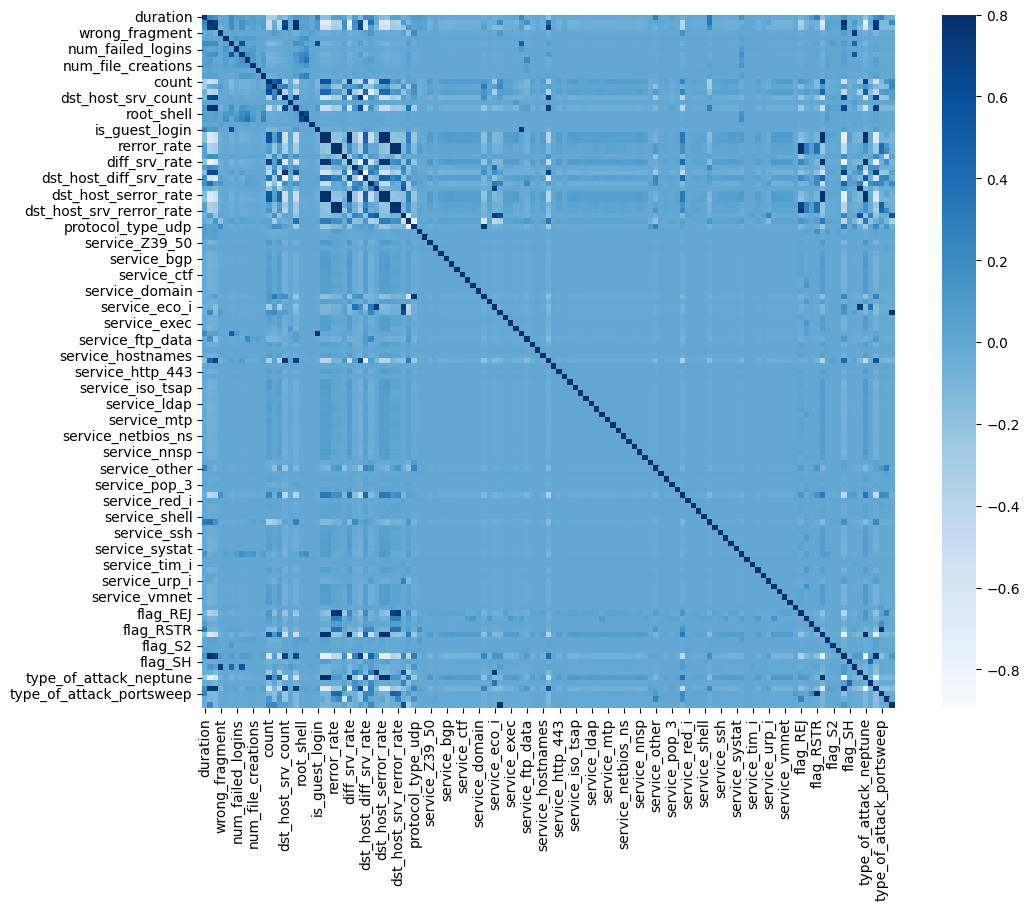

In [257]:
# Check heat map with blue colormap
corr_mat = df_imp.corr(method='spearman') # change df
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat, vmax=.8, square=True, cmap='Blues', ax=ax)
plt.show()

### Abil's Corr

In [ ]:
# Menghasilkan matriks korelasi
corr = df_imp.corr()

# Mengubah diagonal utama (korelasi kolom dengan diri sendiri) menjadi NaN
for i in range(corr.shape[0]):
    corr.iloc[i, i] = np.nan

# Mencari kolom yang memiliki korelasi > 0.95 atau < -0.95
high_corr_cols = (corr.abs() > 0.95).any()

# Menampilkan nama kolom yang memiliki korelasi tinggi dan nilai korelasinya
high_corr_columns = df_imp.columns[high_corr_cols]

# Menampilkan kolom mana yang berkorelasi dengan kolom dalam output
for col in high_corr_columns:
    correlated_cols = corr.index[corr[col].abs() > 0.95].tolist()
    if col in correlated_cols:
        correlated_cols.remove(col)  # Hapus diri sendiri dari daftar jika ada
    print(f"Kolom '{col}' berkorelasi dengan kolom-kolom berikut:")
    print(correlated_cols)
    print("Nilai Korelasi:")
    for correlated_col in correlated_cols:
        correlation_value = corr.loc[col, correlated_col]
        print(f"{correlated_col}: {correlation_value:.2f}")
    print()

In [ ]:
with open('output.txt', 'w') as f:
    for col in high_corr_columns:
        correlated_cols = corr.index[corr[col].abs() > 0.95].tolist()
        if col in correlated_cols:
            correlated_cols.remove(col)  # Hapus diri sendiri dari daftar jika ada
        f.write(f"Kolom '{col}' berkorelasi dengan kolom-kolom berikut:\n")
        f.write(str(correlated_cols) + "\n")
        f.write("Nilai Korelasi:\n")
        for correlated_col in correlated_cols:
            correlation_value = corr.loc[col, correlated_col]
            f.write(f"{correlated_col}: {correlation_value:.2f}\n")
        f.write("\n")

In [ ]:
high_corr_columns = ['num_root','serror_rate','srv_serror_rate','dst_host_serror_rate','flag_S0']
# drop features with high correlation
df_imp.drop(high_corr_columns, axis=1, inplace=True)

In [ ]:
df_imp.shape

### Mark Down

In [ ]:
# # Menghasilkan matriks korelasi
# corr = df_imp.corr()

# # Mengubah diagonal utama (korelasi kolom dengan diri sendiri) menjadi NaN
# for i in range(corr.shape[0]):
#     corr.iloc[i, i] = np.nan

# # Mencari kolom yang memiliki korelasi > 0.95 atau < -0.95
# high_corr_cols = (corr.abs() > 0.95).any()

# # Menampilkan nama kolom yang memiliki korelasi tinggi
# high_corr_columns = df_imp.columns[high_corr_cols]
# print(high_corr_columns)

In [ ]:
# # Menghasilkan matriks korelasi
# corr = df_imp.corr()

# # Mengubah diagonal utama (korelasi kolom dengan diri sendiri) menjadi NaN
# for i in range(corr.shape[0]):
#     corr.iloc[i, i] = np.nan

# # Mencari kolom yang memiliki korelasi > 0.95 atau < -0.95
# high_corr_cols = (corr.abs() > 0.95).any()

# # Menampilkan nama kolom yang memiliki korelasi tinggi dan nilai korelasinya
# high_corr_columns = df_imp.columns[high_corr_cols]

# # Menampilkan kolom mana yang berkorelasi dengan kolom dalam output
# for col in high_corr_columns:
#     correlated_cols = corr.index[corr[col].abs() > 0.95].tolist()
#     if col in correlated_cols:
#         correlated_cols.remove(col)  # Hapus diri sendiri dari daftar jika ada
#     print(f"Kolom '{col}' berkorelasi dengan kolom-kolom berikut:")
#     print(correlated_cols)
#     print("Nilai Korelasi:")
#     for correlated_col in correlated_cols:
#         correlation_value = corr.loc[col, correlated_col]
#         print(f"{correlated_col}: {correlation_value:.2f}")
#     print()

In [ ]:
# # drop features with high correlation
# df_imp.drop(high_corr_columns, axis=1, inplace=True)

In [ ]:
# df_imp.shape

## 1.5 Duplicate Data

In [184]:
# merge df_imp and df type_of_attack
df_imp = pd.concat([df_imp, df['type_of_attack']], axis=1)

In [258]:
df_imp.head()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,flag_SF,flag_SH,type_of_attack_Denial of Service Attack,type_of_attack_ipsweep,type_of_attack_neptune,type_of_attack_nmap,type_of_attack_normal,type_of_attack_portsweep,type_of_attack_satan,type_of_attack_smurf
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,285,3623,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,232,584,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,1,1080,327,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [259]:
ProfileReport(df_imp).get_duplicates()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\gusti\AppData\Local\Programs\Python\Python39\lib\site-packages\ydata_profiling\model\pandas\duplicates_pandas.py:37: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

c:\Users\gusti\AppData\Local\Programs\Python\Python39\lib\site-packages\ydata_profiling\model\pandas\duplicates_pandas.py:37: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

c:\Users\gusti\AppData\Local\Programs\Python\Python39\lib\site-packages\ydata_profiling\model\pandas\duplicates_pandas.py:37: PerformanceWarning:

DataFrame is highly fragmented.  This is us

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,flag_SH,type_of_attack_Denial of Service Attack,type_of_attack_ipsweep,type_of_attack_neptune,type_of_attack_nmap,type_of_attack_normal,type_of_attack_portsweep,type_of_attack_satan,type_of_attack_smurf,# duplicates
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,32
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,29
65,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,20
44,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,17
35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,14
60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,14
56,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,13
260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,13
70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,12
262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,11


In [260]:
df_imp.drop_duplicates(inplace=True)
df_imp

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,flag_SF,flag_SH,type_of_attack_Denial of Service Attack,type_of_attack_ipsweep,type_of_attack_neptune,type_of_attack_nmap,type_of_attack_normal,type_of_attack_portsweep,type_of_attack_satan,type_of_attack_smurf
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,285,3623,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,232,584,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,1,1080,327,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112440,5,1377,328,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
112442,0,309,758,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
112443,0,363,721,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
112444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## 1.6 Save Cleaned Data in CSV

In [ ]:
# save data df_imp to csv
df_imp.to_csv('D:\DAC-2023\Dataset\df_imp_toa.csv', index=False)

In [ ]:
# save data df_imp to csv
df_imp.to_csv('D:\DAC-2023\Dataset\df_imp2.csv', index=False)

## 1.7 SMOOTEENN Method data df_imp

In [261]:
df_imp_cat = df_imp.copy()

In [262]:
# percentage based on 'type_of_attack' in df
df_imp_cat['type_of_attack'].value_counts(normalize=True) * 100

KeyError: 'type_of_attack'

In [190]:
# Menghitung jumlah baris dengan type_of_attack 'normal'
normal_count = (df_imp_cat['type_of_attack'] == 'normal').sum()

# Menghitung jumlah baris dengan type_of_attack lainnya (attack)
attack_count = (df_imp_cat['type_of_attack'] != 'normal').sum()

In [191]:
# Sample data (replace this with your actual data)
data = {'type_of_attack': ['normal', 'attack'],
        'count': [normal_count, attack_count]}

df_count = pd.DataFrame(data)

fig = px.treemap(df_count, 
                 path=['type_of_attack'], 
                 values='count', 
                 title='Normal & Intrusion')

fig.update_traces(textinfo='value+percent parent')
fig.show()

In [192]:
# count based on 'type_of_attack'
count = df_imp_cat[df_imp_cat['type_of_attack'] != 'normal']['type_of_attack'].value_counts()

In [193]:
# Filter data frame to exclude 'normal'
filtered_df = df_imp_cat[df_imp_cat['type_of_attack'] != 'normal']

# Count the occurrences of each type of attack
count = filtered_df['type_of_attack'].value_counts().reset_index()
count.columns = ['type_of_attack', 'count']

# Create the TreeMap
fig = px.treemap(data_frame=count, path=['type_of_attack'], values='count')

# Show the plot
fig.show()

In [194]:
# Membuat DataFrame yang hanya berisi baris dengan 'type_of_attack' sama dengan 'normal'
normal_df = df_imp_cat[df_imp_cat['type_of_attack'] == 'normal']

In [195]:
# intrusion_df 
# Membuat DataFrame yang hanya berisi baris dengan 'type_of_attack' != 'normal'
intrusion_df = df_imp_cat[df_imp_cat['type_of_attack'] != 'normal']

In [196]:
X = intrusion_df.iloc[:, :-1]
y = intrusion_df['type_of_attack']

smote_enn = SMOTEENN(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [197]:

# Combine X_resampled and y_resampled into a DataFrame
intrusion_df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
intrusion_df_resampled['type_of_attack'] = y_resampled

# Filter data frame to exclude 'normal'
filtered_df = intrusion_df_resampled[intrusion_df_resampled['type_of_attack'] != 'normal']

# Count the occurrences of each type of attack
count = filtered_df['type_of_attack'].value_counts().reset_index()
count.columns = ['type_of_attack', 'count']

# Create the TreeMap
fig = px.treemap(data_frame=count, path=['type_of_attack'], values='count')

# Show the plot
fig.show()


C:\Users\gusti\AppData\Local\Temp\ipykernel_31376\2018835135.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



In [198]:
# show shape of intrusion_df_resampled
intrusion_df_resampled.shape

(252489, 122)

In [199]:
# show data intrusion_df_resampled
intrusion_df_resampled

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,type_of_attack
0,0,54540,8314,0,0,2,0,1,0,0,...,0,0,0,0,0,0,0,1,0,Denial of Service Attack
1,0,28,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Denial of Service Attack
2,9,54540,8314,0,0,2,0,1,0,0,...,0,0,0,0,0,0,0,1,0,Denial of Service Attack
3,1,54540,8314,0,0,2,0,1,0,0,...,0,0,0,0,0,0,0,1,0,Denial of Service Attack
4,0,1480,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Denial of Service Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252484,0,1032,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,smurf
252485,0,520,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,smurf
252486,0,1032,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,smurf
252487,0,1032,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,smurf


In [200]:
# save data intrusion_df_resampled to csv
intrusion_df_resampled.to_csv('D:\DAC-2023\Dataset\intrusion_df_resampled.csv', index=False)

## 1.7 SMOOTEENN Method

In [124]:
df_imp_cat = pd.read_csv('D:\DAC-2023\Dataset\df_imp_cat.csv')

In [125]:
# percentage based on 'type_of_attack' in df
df_imp_cat['type_of_attack'].value_counts(normalize=True) * 100

type_of_attack
normal                      54.068569
neptune                     33.994714
ipsweep                      2.675827
portsweep                    2.329047
satan                        2.278436
smurf                        2.022569
Denial of Service Attack     1.494901
nmap                         1.135938
Name: proportion, dtype: float64

In [126]:
# Menghitung jumlah baris dengan type_of_attack 'normal'
normal_count = (df_imp_cat['type_of_attack'] == 'normal').sum()

# Menghitung jumlah baris dengan type_of_attack lainnya (attack)
attack_count = (df_imp_cat['type_of_attack'] != 'normal').sum()

In [128]:
# Sample data (replace this with your actual data)
data = {'type_of_attack': ['normal', 'attack'],
        'count': [normal_count, attack_count]}

df_count = pd.DataFrame(data)

fig = px.treemap(df_count, 
                 path=['type_of_attack'], 
                 values='count', 
                 title='Normal & Intrusion')

fig.update_traces(textinfo='value+percent parent')
fig.show()

In [ ]:
# count based on 'type_of_attack'
count = df_imp_cat[df_imp_cat['type_of_attack'] != 'normal']['type_of_attack'].value_counts()

In [ ]:
# Filter data frame to exclude 'normal'
filtered_df = df_imp_cat[df_imp_cat['type_of_attack'] != 'normal']

# Count the occurrences of each type of attack
count = filtered_df['type_of_attack'].value_counts().reset_index()
count.columns = ['type_of_attack', 'count']

# Create the TreeMap
fig = px.treemap(data_frame=count, path=['type_of_attack'], values='count')

# Show the plot
fig.show()

In [ ]:
# Membuat DataFrame yang hanya berisi baris dengan 'type_of_attack' sama dengan 'normal'
normal_df = df_imp_cat[df_imp_cat['type_of_attack'] == 'normal']

In [ ]:
# intrusion_df 
# Membuat DataFrame yang hanya berisi baris dengan 'type_of_attack' != 'normal'
intrusion_df = df_imp_cat[df_imp_cat['type_of_attack'] != 'normal']

In [ ]:
X = intrusion_df.iloc[:, :-1]
y = intrusion_df['type_of_attack']

smote_enn = SMOTEENN(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [ ]:

# Combine X_resampled and y_resampled into a DataFrame
intrusion_df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
intrusion_df_resampled['type_of_attack'] = y_resampled

# Filter data frame to exclude 'normal'
filtered_df = intrusion_df_resampled[intrusion_df_resampled['type_of_attack'] != 'normal']

# Count the occurrences of each type of attack
count = filtered_df['type_of_attack'].value_counts().reset_index()
count.columns = ['type_of_attack', 'count']

# Create the TreeMap
fig = px.treemap(data_frame=count, path=['type_of_attack'], values='count')

# Show the plot
fig.show()


## Ga paham serius

# 2 Uji Asumsi Klasik

In [ ]:
# uji normalitas
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import kstest

In [ ]:
# normality test
def normality_test(data):
    stat, p = shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

In [ ]:
normality_test(df_imp)

In [ ]:
# uji multikolinearitas
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_imp.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_imp.values, i)
                          for i in range(len(df_imp.columns))]

print(vif_data)

# 2 Exploratory Data Analysis (EDA)

## Statistika umum

In [ ]:
ProfileReport(df_imp)

## duration, src, dst

In [ ]:
def filtered_by_type_of_attack(df, values):
    filtered = df[df['type_of_attack'] == values]
    return filtered

In [ ]:
dos = filtered_by_type_of_attack(df, 'Denial of Service Attack')

In [ ]:
dsd = dos[['duration', 'src_bytes', 'dst_bytes', 'type_of_attack']]
dsd.head()

In [ ]:
dsd.src_bytes.unique()

In [ ]:
dsd.dst_bytes.unique()

In [ ]:
# Create a boolean mask to identify rows with NaN values
nan_mask = dsd.isna().any(axis=1)

# Filter the DataFrame to show only rows with NaN values
rows_with_nan = dsd[nan_mask]

# Print the rows with NaNs
rows_with_nan

In [ ]:
# show index 52524
dsd.loc[52524]

In [ ]:
dsd.info()

In [ ]:
dsd.duration.unique()

In [ ]:
dsd.info()

In [ ]:
# Replace the '*'s with NaNs
dsd = dsd.replace('*', np.nan)

In [ ]:
# Mengganti nilai "*" dengan  pada kolom 'duration', 'src_bytes', dan 'dst_bytes'
dsd['duration'] = dsd['duration'].replace('*', np.nan)
dsd['src_bytes'] = dsd['src_bytes'].replace('*', np.nan)
dsd['dst_bytes'] = dsd['dst_bytes'].replace('*', np.nan)

In [ ]:
# Mengubah tipe data menjadi numerik
dsd['duration'] = pd.to_numeric(dsd['duration'])
dsd['src_bytes'] = pd.to_numeric(dsd['src_bytes'])
dsd['dst_bytes'] = pd.to_numeric(dsd['dst_bytes'])

In [ ]:
# merubah tipe data menjadi integer
dsd['duration'] = dsd['duration'].astype(int)
dsd['src_bytes'] = dsd['src_bytes'].astype(int)
dsd['dst_bytes'] = dsd['dst_bytes'].astype(int)

In [ ]:
# Menampilkan informasi DataFrame
dsd.info()

In [ ]:
dsd.src_bytes.unique()

In [ ]:
# spline interpolation
dsd['duration'].interpolate(method= 'linear')
dsd['src_bytes'].interpolate(method='linear')
dsd['dst_bytes'].interpolate(method='linear')

In [ ]:
# fill missing value with spline interpolation
dsd['duration'].interpolate(inplace=True)
dsd['src_bytes'].interpolate(inplace=True)
dsd['dst_bytes'].interpolate(inplace=True)

In [ ]:
# check missing value
dsd.isnull().sum()

In [ ]:
dsd.describe()

In [ ]:
# boxplot
sns.boxplot(data=dsd)

## Checking data type

In [ ]:
# is_host_login type and unique value
unique_values_host_login = df['is_host_login'].unique()
print(unique_values_host_login)

# change to data type bool

In [ ]:
# is_guest_login type and unique value
unique_values_guest_login = df['is_guest_login'].unique()
print(unique_values_guest_login)

# change to data type bool

In [ ]:
# count data type and unique values
unique_values_count = df['count'].unique()
unique_values_count

# change to data type to int

In [ ]:
# srv_count data type and unique values
unique_values_srv_count = df['srv_count'].unique()
unique_values_srv_count

# change to data type to int

In [ ]:
# serror_rate data type and unique values
unique_values_serror_rate = df['serror_rate'].unique()
unique_values_serror_rate

# change to data type to float

In [ ]:
# srv_serror_rate data type and unique values
unique_values_srv_serror_rate = df['srv_serror_rate'].unique()
unique_values_srv_serror_rate

# change to data type to float

In [ ]:
# rerror_rate data type and unique values
unique_values_rerror_rate = df['rerror_rate'].unique()
unique_values_rerror_rate

# change to data type to float

In [ ]:
# srv_rerror_rate data type and unique values
unique_values_srv_rerror_rate = df['srv_rerror_rate'].unique()
unique_values_srv_rerror_rate

# change to data type to float

In [ ]:
# same_srv_rate data type and unique values
unique_values_same_srv_rate = df['same_srv_rate'].unique()
unique_values_same_srv_rate

# change to data type to float

In [ ]:
# diff_srv_rate data type and unique values
unique_values_diff_srv_rate = df['diff_srv_rate'].unique()
unique_values_diff_srv_rate

# change to data type to float

In [ ]:
# srv_diff_host_rate data type and unique values
unique_values_srv_diff_host_rate = df['srv_diff_host_rate'].unique()
unique_values_srv_diff_host_rate

# change to data type to float

In [ ]:
# dst_host_count data type and unique values
unique_values_dst_host_count = df['dst_host_count'].unique()
unique_values_dst_host_count

# change to data type to int

In [ ]:
# dst_host_srv_count data type and unique values
unique_values_dst_host_srv_count = df['dst_host_srv_count'].unique()
unique_values_dst_host_srv_count

# change to data type to int

In [ ]:
# dst_host_same_srv_rate data type and unique values
unique_values_dst_host_same_srv_rate = df['dst_host_same_srv_rate'].unique()
unique_values_dst_host_same_srv_rate

# change to data type to float

In [ ]:
# dst_host_diff_srv_rate data type and unique values
unique_values_dst_host_diff_srv_rate = df['dst_host_diff_srv_rate'].unique()
unique_values_dst_host_diff_srv_rate

# change to data type to float

In [ ]:
# dst_host_same_src_port_rate data type and unique values
unique_values_dst_host_same_src_port_rate = df['dst_host_same_src_port_rate'].unique()
unique_values_dst_host_same_src_port_rate

# change to data type to float

In [ ]:
# dst_host_srv_diff_host_rate data type and unique values
unique_values_dst_host_srv_diff_host_rate = df['dst_host_srv_diff_host_rate'].unique()
unique_values_dst_host_srv_diff_host_rate

# change to data type to float

In [ ]:
# dst_host_serror_rate data type and unique values
unique_values_dst_host_serror_rate = df['dst_host_serror_rate'].unique()
unique_values_dst_host_serror_rate

# change to data type to float

In [ ]:
# dst_host_srv_serror_rate data type and unique values
unique_values_dst_host_srv_serror_rate = df['dst_host_srv_serror_rate'].unique()
unique_values_dst_host_srv_serror_rate

# change to data type to float

In [ ]:
# dst_host_rerror_rate data type and unique values
unique_values_dst_host_rerror_rate = df['dst_host_rerror_rate'].unique()
unique_values_dst_host_rerror_rate

# change to data type to float

In [ ]:
# dst_host_srv_rerror_rate data type and unique values
unique_values_dst_host_srv_rerror_rate = df['dst_host_srv_rerror_rate'].unique()
unique_values_dst_host_srv_rerror_rate

# change to data type to float

In [ ]:
# type_of_attack data type and unique values
unique_values_type_of_attack = df['type_of_attack'].unique()
unique_values_type_of_attack

# change to data type to category

## Nilai 999 dan 99999

In [ ]:
# Mencari kolom-kolom yang mengandung nilai 999 atau 99999
kolom_dengan_999 = df.columns[df.eq(999).any()]
kolom_dengan_99999 = df.columns[df.eq(99999).any()]

# Menampilkan hasil
print("Kolom dengan nilai 999:")
print(kolom_dengan_999)

print("\nKolom dengan nilai 99999:")
print(kolom_dengan_99999)


In [ ]:
# Mencari kolom-kolom yang mengandung nilai 999 atau 99999
kolom_dengan_999 = df_p.columns[df_p.eq(999).any()]


## Perbandingan Persentase type of attack

In [ ]:
persentase = df.type_of_attack.value_counts(normalize=True) * 100
persentase

In [ ]:
# Mengelompokkan hasil berdasarkan aturan yang diberikan
grouped_results = {
    "Normal": persentase["normal"],
    "DoS": persentase["Denial of Service Attack"] + persentase["neptune"] + persentase["smurf"],
    "Probe": persentase["nmap"] + persentase["portsweep"] + persentase["satan"] + persentase["ipsweep"]
}

# Menampilkan hasil
for group, percentage in grouped_results.items():
    print(f"{group}: {percentage:.2f}%")


In [ ]:
# Menghitung jumlah Normal, DoS, dan Probe
jumlah_normal = df[df['type_of_attack'] == 'normal'].shape[0]
jumlah_dos = df[df['type_of_attack'].isin(['Denial of Service Attack', 'neptune', 'smurf'])].shape[0]
jumlah_probe = df[df['type_of_attack'].isin(['nmap', 'portsweep', 'satan', 'ipsweep'])].shape[0]

# Menampilkan hasil
print(f"Jumlah Normal: {jumlah_normal}")
print(f"Jumlah DoS: {jumlah_dos}")
print(f"Jumlah Probe: {jumlah_probe}")


## NaN and * value

In [ ]:

# Menghitung jumlah nilai NaN dalam DataFrame
jumlah_nan = df.isna().sum().sum()

# Menghitung jumlah nilai "*" dalam DataFrame
jumlah_asterisk = (df == '*').sum().sum()

# Menghitung total elemen dalam DataFrame
total_elemen = df.size

# Menghitung persentase NaN dan "*" dalam DataFrame
persentase_nan = (jumlah_nan / total_elemen) * 100
persentase_asterisk = (jumlah_asterisk / total_elemen) * 100

# Menampilkan hasil
print(f"Jumlah NaN: {jumlah_nan}")
print(f"Jumlah '*': {jumlah_asterisk}")
print(f"Persentase NaN: {persentase_nan:.2f}%")
print(f"Persentase '*': {persentase_asterisk:.2f}%")

## Fitur terkait keamanan

In [ ]:
k_secure = df[['num_failed_logins', 'num_access_files', 
                 'num_compromised', 'root_shell', 
                 'su_attempted', 'type_of_attack']]
k_secure.head()

In [ ]:
k_secure.info()

In [ ]:
k_secure_sorted1 = k_secure.sort_values(by='num_failed_logins', ascending=False)
k_secure_sorted1.head()

In [ ]:
k_secure_sorted2 = k_secure.sort_values(by='num_access_files', ascending=False)
k_secure_sorted2.head()

In [ ]:
k_secure_sorted3 = k_secure.sort_values(by='num_compromised', ascending=False)
k_secure_sorted3.head()

In [ ]:
k_secure_sorted4 = k_secure.sort_values(by='root_shell', ascending=False)
k_secure_sorted4.head()

In [ ]:
k_secure_sorted5 = k_secure.sort_values(by='su_attempted', ascending=False)
k_secure_sorted5.head()

In [ ]:
k_secure.describe()

In [ ]:
k_secure['num_failed_logins'].value_counts().sort_index()

## FItur Terkait koneksi

In [ ]:
c_conection = df[['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'type_of_attack']]
c_conection.head()

In [ ]:
c_conection.describe()

In [ ]:
c_conection.info()

## Fitur Error Rate

In [ ]:
r_error = df[['serror_rate', 'rerror_rate', 
                'srv_serror_rate', 'srv_rerror_rate', 
                'dst_host_serror_rate', 'dst_host_rerror_rate', 'type_of_attack']]
r_error.head() 

In [ ]:
r_error.describe()

In [ ]:
r_error.info()

In [ ]:
r_error_g = r_error.groupby(by='type_of_attack')['serror_rate'].count().sort_values(ascending=False)
r_error_g

## Fitur Terkait Host (BERANTAKAN)

Clean wkwk hapus "*" value dan hapus "99999" value

In [ ]:
host = df[['dst_host_count', 'dst_host_srv_count', 
             'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'type_of_attack']]
host.head()

In [ ]:
# Membuat bubble plot hanya untuk data yang memiliki dst_host_count dan dst_host_srv_count == '99999'
filtered_host = host[(host['dst_host_srv_count'] == '99999')]

In [ ]:
filtered_host

In [ ]:
fgrup = filtered_host.groupby(by='type_of_attack')['dst_host_srv_count'].count().sort_values(ascending=False)
fgrup

In [ ]:
host.head().sort_values(by='dst_host_count', ascending=False)

In [ ]:
host.head().sort_values(by='dst_host_srv_count', ascending=False)  

In [ ]:
host.head().sort_values(by='dst_host_same_srv_rate', ascending=False)

In [ ]:
host.sort_values(by='type_of_attack', ascending=True)

In [ ]:
host.info()

In [ ]:
host['dst_host_count'] = pd.to_numeric(host['dst_host_count'])
host['dst_host_srv_count'] = pd.to_numeric(host['dst_host_srv_count'])

In [ ]:
host.describe()

In [ ]:
invalid_values = host[host['dst_host_count'] == '*'].count()
invalid_values

In [ ]:
invalid_values2 = host[host['dst_host_count'] == '99999'].count()
invalid_values2

In [ ]:
host = host[host['dst_host_count'] != '*']
host = host[host['dst_host_srv_count'] != '*']

In [ ]:
host = host[host['dst_host_count'] != '99999']
host = host[host['dst_host_srv_count'] != '99999']

In [ ]:
host = host[host['type_of_attack'] != 'Normal']

In [ ]:
login = df[['dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',]]
login.head()

In [ ]:
# Hitung Q1, Q3, dan IQR
Q1 = host['dst_host_count'].quantile(0.25)
Q3 = host['dst_host_count'].quantile(0.75)
IQR = Q3 - Q1

# Hitung Batas Atas dan Batas Bawah
Upper_Bound = Q3 + 1.5 * IQR
Lower_Bound = Q1 - 1.5 * IQR

# Mengecualikan data outlier
filtered_host = host[(host['dst_host_count'] >= Lower_Bound) & (host['dst_host_count'] <= Upper_Bound)]

In [ ]:
# Membuat sebuah figure dengan subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Membuat violin plot untuk kolom dst_host_count
sns.violinplot(x='dst_host_count', data=host, ax=axes[0, 0])
axes[0, 0].set_title('Violin Plot - dst_host_count')

# Membuat violin plot untuk kolom dst_host_srv_count
sns.violinplot(x='dst_host_srv_count', data=host, ax=axes[0, 1])
axes[0, 1].set_title('Violin Plot - dst_host_srv_count')

# Membuat violin plot untuk kolom dst_host_same_srv_rate
sns.violinplot(x='dst_host_same_srv_rate', data=host, ax=axes[1, 0])
axes[1, 0].set_title('Violin Plot - dst_host_same_srv_rate')

# Membuat violin plot untuk kolom dst_host_diff_srv_rate
sns.violinplot(x='dst_host_diff_srv_rate', data=host, ax=axes[1, 1])
axes[1, 1].set_title('Violin Plot - dst_host_diff_srv_rate')

# Mengatur tata letak subplot
plt.tight_layout()

# Menampilkan plot
plt.show()


In [ ]:
# Konversi kolom dst_host_count menjadi tipe data numerik
host['dst_host_count'] = pd.to_numeric(host['dst_host_count'], errors='coerce')

# Membuat sebuah figure
plt.figure(figsize=(8, 6))

# Membuat boxplot untuk kolom dst_host_count
sns.boxplot(x='dst_host_count', data=host)
plt.title('Box Plot - dst_host_count')

# Menampilkan plot
plt.show()

In [ ]:
# Membuat sebuah figure
plt.figure(figsize=(8, 6))

# Membuat scatter plot untuk kolom dst_host_count dan dst_host_srv_count
sns.scatterplot(x='dst_host_count', y='dst_host_srv_count', data=host)
plt.title('Scatter Plot - dst_host_count vs dst_host_srv_count')

# Menampilkan plot
plt.show()

In [ ]:
# Membuat bubble plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='dst_host_count', y='dst_host_srv_count', size='dst_host_same_srv_rate', data=host, sizes=(50, 500))
plt.title('Bubble Plot - dst_host_count vs dst_host_srv_count')
plt.xlabel('dst_host_count')
plt.ylabel('dst_host_srv_count')

# Menampilkan plot
plt.show()

## Fitur Terkait Distribusi Port

In [ ]:
port = df[['dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'service', 'type_of_attack']]

In [ ]:
port.head()

In [ ]:
port.info()

In [ ]:
# grupby dst_host_srv_diff_host_rate
p_g1 = port.groupby(by='dst_host_srv_diff_host_rate')['dst_host_same_src_port_rate'].count().sort_values(ascending=False)
p_g1

In [ ]:
# grupby dst_host_srv_diff_host_rate
p_g2 = port.groupby(by='dst_host_srv_diff_host_rate')['dst_host_srv_diff_host_rate'].count().sort_values(ascending=False)
p_g2

In [ ]:
# menghapus nilai * pada kolom dst_host_same_src_port_rate dan dst_host_srv_diff_host_rate
port = port[port['dst_host_same_src_port_rate'] != '*']
port = port[port['dst_host_srv_diff_host_rate'] != '*']

In [ ]:
# menghapus nilai 99999 pada kolom dst_host_same_src_port_rate dan dst_host_srv_diff_host_rate
port = port[port['dst_host_same_src_port_rate'] != '99999']
port = port[port['dst_host_srv_diff_host_rate'] != '99999']

In [ ]:
# merubah tipe data dst_host_same_src_port_rate dan dst_host_srv_diff_host_rate menjadi numerik
port['dst_host_same_src_port_rate'] = pd.to_numeric(port['dst_host_same_src_port_rate'])
port['dst_host_srv_diff_host_rate'] = pd.to_numeric(port['dst_host_srv_diff_host_rate'])

In [ ]:
port_x = port

In [ ]:
# Specify a list of markers for each unique type_of_attack
markers = ["o", "s", "D", "X", "P", "*", "^", "v"]

# Create a pair plot
sns.pairplot(port_x, hue='type_of_attack', diag_kind='kde', markers=markers, palette='Set1')
plt.suptitle('Pair Plot - Persebaran dan Korelasi Data', y=1.02)

# Show the plot
plt.show()

# *Danger Area*

## X ***Kategori Variabel***

In [ ]:
k_vars = df[['protocol_type', 'service', 'flag']]
k_vars.head()

## **Looking at Type of Attack**

label column : type of attack

In [ ]:
attack_type = dfrain['type_of_attack'].unique()

print("Nilai yang ada dalam kolom x3:")
print(attack_type)

TYPE OF ATTACK :
- nmap
- neptune
- normal
- Denial of Service Attack
- portsweep
- satan
- ipsweep
- smurf

Normal

DOS ATTACK: 
neptune -> working to SYN flood Denial of Service on one or more ports, Neptune attack make the memory resources busy by sending TCP packet requesting to initiate a TCP session,
DOS ->  makes the computer system to be hectic by sending many ping, 
Smurf -> Denial of Service ICMP echo reply flood. 

PROBE: nmap, portsweep, satan, ipsweep, 

This paper focused on Neptune and Smurf types of attack. Those attack characterized as DoS Attack. Dos Attack makes the computer system to be hectic by sending many ping. Neptune attack working to SYN flood Denial of Service on one or more ports while the function of Smurf attack is Denial of Service ICMP echo reply flood. Neptune attack make the memory resources busy by sending TCP packet requesting to initiate a TCP session.  After many TCP packet sent, the computer system finally runs out of memory resources. Smurf attack is the popular type of attack sending ICMP echo request packet to middle device. ICMP packets have source address name as victim’s IP address and middle device address as destination address. DoS attack reduces the performance of server by overflowing the ICMP traffic as discussed above in the Neptune and Smurf attack. So, detection of DoS attack is very significant to protect the system. 

KOLOM KUNCI:
- protocol type
- port
- 

In [ ]:
def filtered_by_type_of_attack(df, values):
    filtered = df[df['type_of_attack'] == values]
    return filtered

In [ ]:
filtered_by_type_of_attack(dfrain, 'nmap')

In [ ]:
ProfileReport(filtered_by_type_of_attack(dfrain, 'nmap'))

In [ ]:
filtered_by_type_of_attack(dfrain, 'neptune')

In [ ]:
filtered_by_type_of_attack(dfrain, 'normal')

In [ ]:
filtered_by_type_of_attack(dfrain, 'Denial of Service Attack')

In [ ]:
filtered_by_type_of_attack(dfrain, 'portsweep')

In [ ]:
filtered_by_type_of_attack(dfrain, 'satan')

In [ ]:
filtered_by_type_of_attack(dfrain, 'ipsweep')

In [ ]:
filtered_by_type_of_attack(dfrain, 'smurf')

## **Duplicate Data**

In [ ]:
duplicates = dfrain[df.duplicated()]

In [ ]:
duplicates

is it really duplicate? harus nemu variabel kunci yg menentukan itu row duplicate or no. atau jangan jangan nilai duplicate ini bisa jadi kunci network attack (karena patternnya sama)